## Simulation of a Marked Exponential Hawkes Process

In [12]:
from functions.hawkes_process import *
from functions.multivariate_exponential_process import *
import scipy 

In [13]:
np.random.seed(0)

### Unidimensional marked exponential Hawkes process

We start by simulating a unidimensional Hawkes process denoted $N$. The intensity of the process is given by the formula: $\begin{equation} \lambda(t) = m + \int_{(-\infty ,t)\times \mathcal{E} } a e^{-b(t-s)} \phi_{\gamma, \psi}(\kappa) N(ds \times d\kappa), \end{equation}$


with $\kappa$ being an i.i.d. random variable with a c.d.f. $F_\psi$, admitting a density $f_\psi$.

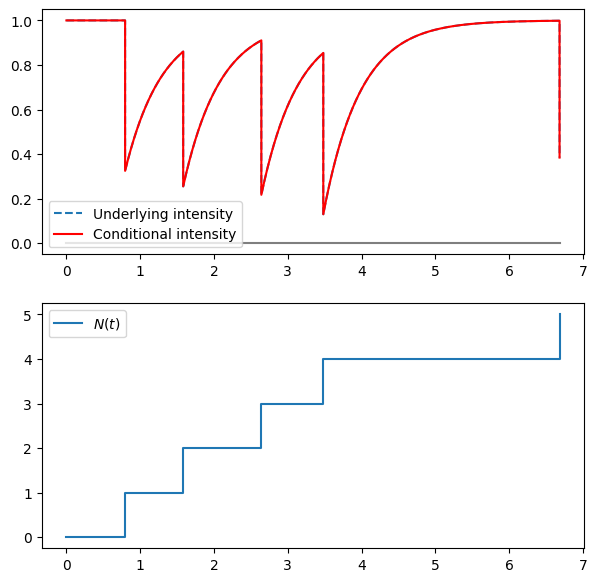

In [14]:
m, a, b = 1, -1, 2
Tmax = 5

## taking kappa i.i.d following a exponential distribution of parameter 1
def F(mark,time,psi):
    return(scipy.stats.expon.cdf(mark, scale = psi))

def phi(mark, gamma, psi):
    return((psi-gamma)/psi*np.exp(mark*gamma))

def f(mark,t, psi):
    return(psi*np.exp(-psi*mark))


hawkes = exp_thinning_hawkes_marked(m=m,
                                    a=a, 
                                    b=b, 
                                    F = F ,
                                    arg_F = {'psi':2},
                                    phi=phi, 
                                    arg_phi = {'gamma': 1},
                                    max_jumps = 5 )


hawkes.simulate()

fig, ax = plt.subplots(2,1, figsize=(7,7))
hawkes.plot_intensity(ax =ax)

fig.savefig('plot/simulation_MEHP.png')

### Multidimensionnal marked exponential Hawkes process


We now consider a multidimensional Hawkes process for which the intensity $\lambda_i$ of the i-th subprocess takes the form: $\begin{equation} \lambda_{i}(t) = m_i + \sum_{j=1}^{d} \int_{(-\infty ,t)\times \mathcal{E}} a_{ij} e^{-b_i(t-s)} \phi_{\gamma, \psi}(\kappa) N^j(ds \times d\kappa), \end{equation}$

with $\kappa$ being an i.i.d. random variable with a c.d.f. $F_\psi$, admitting a density $f_\psi$.

In [15]:
m = np.array([0.5, 0.2]).reshape((2,1))
a = np.array([[0.4, 0.2,], 
                  [-0.4, 0.3]] )
b = np.array([[1],[1.5]])


Tmax = 10
phi_arg = 0.5

def F(mark,time,psi):
    return(scipy.stats.expon.cdf(mark, scale = psi))

def phi(mark, gamma, psi):
    return((psi-gamma)/psi*np.exp(mark*gamma))

def f(mark,t, psi):
    return(psi*np.exp(-psi*mark))

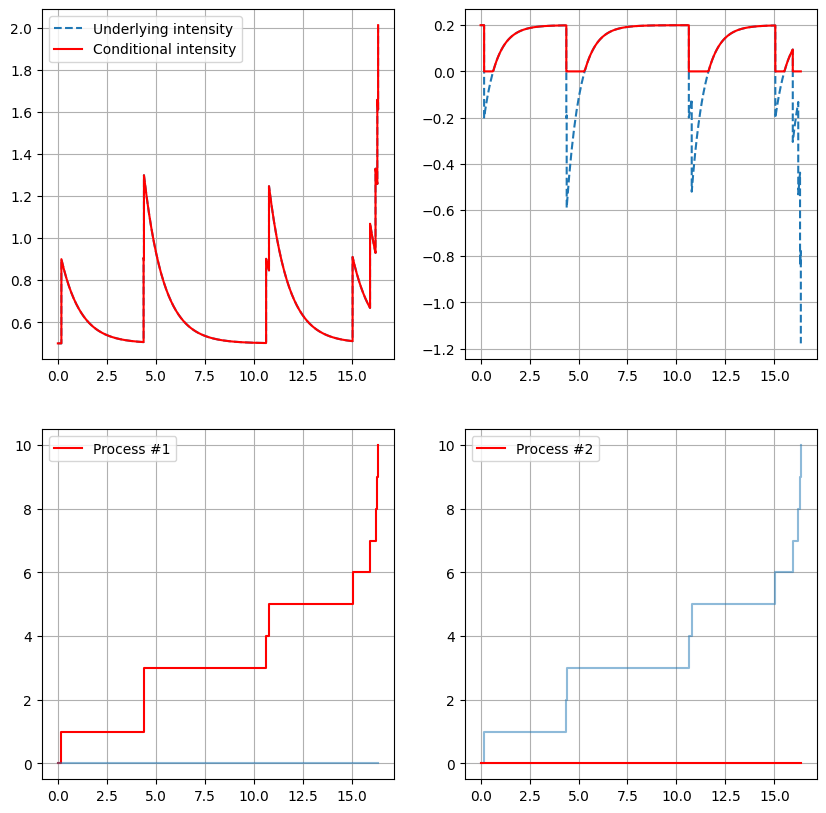

In [16]:
hawkes_multi = multivariate_exponential_hawkes_marked(m=m,
                                                      a=a, 
                                                      b=b, 
                                                      phi = phi, 
                                                      F= F, 
                                                      arg_phi={'gamma':phi_arg}, 
                                                      arg_F={'psi': 2}, 
                                                      max_jumps  = 10)

hawkes_multi.simulate()

fig,ax = plt.subplots(2,2, figsize = (10,10))
hawkes_multi.plot_intensity(ax = ax)
fig.savefig('plot/simulation_MMEHP.png')